<a href="https://colab.research.google.com/github/kajol16/Understanding_Overfitting/blob/main/Understanding_overfitting_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are using higher order linear regression to understand and learn the concept of overfitting

Importing the necessary Libraries

In [ ]:
import matplotlib.pyplot as plot
import numpy as np

#here the %matplotlib inline command is used so that we can view the plots in the notebook directly
%matplotlib inline  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Declaring Number of data points required and the polynomial degree for linear regression and uniform distribution from 0 to 1 for X for the given number of data points

In [ ]:


#helps us get pseudo random numbers
np.random.seed(0)

#number of data points to be generated
data_points = 20

#degrees for polynomial:  0, 1, 3, 9
degrees = [0,1, 3, 9]

#Syntax : numpy.random.uniform(low=0.0, high=1.0, size=None)
x = np.sort(np.random.uniform(0, 1, data_points))
print(x)

[0.0202184  0.07103606 0.0871293  0.38344152 0.4236548  0.43758721
 0.52889492 0.54488318 0.5488135  0.56804456 0.60276338 0.64589411
 0.71518937 0.77815675 0.79172504 0.83261985 0.87001215 0.891773
 0.92559664 0.96366276]


Sampling N from the normal gaussian distribution 

In [ ]:
n = np.random.normal(0,1)
print(n)

1.4940790731576061


Defining function for the equation
" sin(2*pi*X) " 

In [ ]:
def Func(x):
  return np.sin(2*np.pi*x)

Splitting Training and testing data

In [ ]:
train_x = np.sort(x[10:])
test_x = np.sort(x[:10])
train_x = train_x[:np.newaxis]
test_x = test_x[:np.newaxis]
print(test_x)
print(train_x)



[0.0202184  0.07103606 0.0871293  0.38344152 0.4236548  0.43758721
 0.52889492 0.54488318 0.5488135  0.56804456]
[0.60276338 0.64589411 0.71518937 0.77815675 0.79172504 0.83261985
 0.87001215 0.891773   0.92559664 0.96366276]


Calling the function to use for the equation : y = sin(2*pi*X) + 0.1 * N

In [ ]:
y = Func(x) + 0.1 * n
train_y = Func(train_x) + 0.1 * n
print(train_y)
test_y = Func(test_x) + 0.1 * n
print(test_y)
y_ze = np.full((10,1),n)
y_ze


[-0.45233485 -0.64417786 -0.82676772 -0.83498357 -0.81642293 -0.71885027
 -0.57950847 -0.47939312 -0.30123921 -0.07692731]
[ 0.27610243  0.58106833  0.66991911  0.81803321  0.61091302  0.53158503
 -0.03114851 -0.12887828 -0.15251046 -0.26522247]


array([[1.49407907],
       [1.49407907],
       [1.49407907],
       [1.49407907],
       [1.49407907],
       [1.49407907],
       [1.49407907],
       [1.49407907],
       [1.49407907],
       [1.49407907]])

Plotting and showing the randomly generated values of x and y. We are using np.linspace here so that we can have an numeric sequence

[]

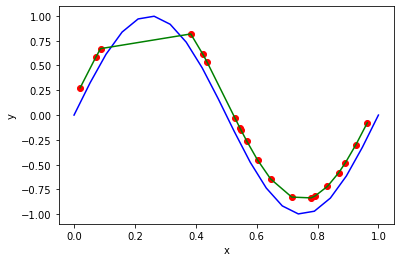

In [ ]:
sin_sample = np.linspace(0, 1, 20).reshape((-1,1))
plot.plot(sin_s, Func(sin_sample), color='blue')
plot.scatter(x, y, color='red')
plot.plot(x, y, color='green')
plot.xlabel("x")
plot.ylabel("y")
plot.plot()

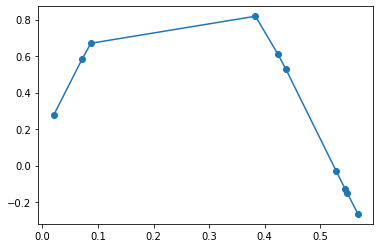

In [ ]:
plot.scatter(test_x, test_y)
plot.plot(test_x, test_y)


In [ ]:
from sklearn.pipeline import make_pipeline
def show_plot_func(degrees, train_x, train_y, test_x, preds):
  plot.scatter(X_train, y_train)
  plot.plot(x_sin, Func(sin_sample), color='green')
  plot.plot(X_test, preds, color='m')
  plot.title('When order, M='+degrees)
  plot.xlabel('X')
  plot.ylabel('y=sin(2*pi*X)+N')
  plot.xlim((0, 1))
  plot.ylim((-1, 1))
  plot.show()

A chart of fit data for degrees (0,1,3,9)

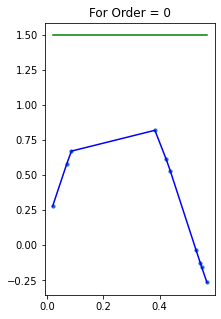

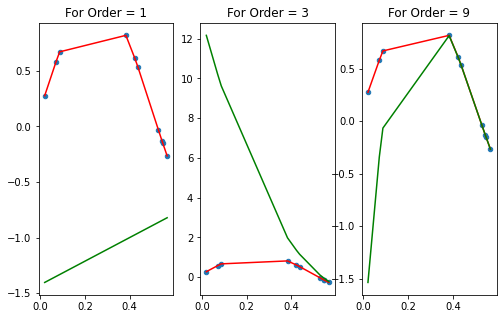

In [ ]:
w = []
error_train = []
error_test = []
coe = []

model=LinearRegression()
model.fit(train_x.reshape(-1, 1), y_ze)
y_pred_train = model.predict(train_x.reshape(-1, 1))
y_pred_test = model.predict(test_x.reshape(-1, 1))

train_error = np.sqrt(((y_pred_train-train_y)**2).mean())
error_train.append(train_error)

test_error = np.sqrt(((y_pred_test-test_y)**2).mean())
error_test.append(test_error)

coe.append(model.coef_)
#using coef_ because it contains the coefficients for the prediction of 
#the targets. It is also the same as if you trained a model to predict each of 
#the targets separately.
w = coe

plot.figure(figsize=(14,5))
plot.subplot(1,4,1)
plot.plot(test_x , test_y, color = 'b' , label = 'Function')
plot.scatter(test_x , test_y , s=10, label = 'sample')
plot.plot(test_x, y_pred_test, color = 'g', label = 'Model')
plot.title ('For Order = 0')
plot.show()

j=0
plot.figure(figsize=(14,5))
for i in range(1,10):
  model = LinearRegression()
  pol = PolynomialFeatures(degree=i , include_bias=True)
  pol.fit(train_x.reshape(-1, 1))
  x_train_pol = pol.transform(train_x.reshape(-1, 1))

  x_test_pol = pol.transform(test_x.reshape(-1, 1))
  model.fit(x_train_pol, train_y)

  y_pred_train_pol = model.predict(x_train_pol)
  tr_error = np.sqrt(((y_pred_train_pol-train_y)**2).mean())
  error_train.append(tr_error)

  y_pred_test_pol = model.predict(x_test_pol)
  tst_error = np.sqrt(((y_pred_test_pol-test_y)**2).mean())
  error_test.append(tst_error)

  if(i==1 or i==3 or i==9):
    
    plot.subplot(1, len(degrees)+1, j + 2)
    plot.scatter(test_x , test_y , s=20, label = 'sample')
    plot.plot(test_x, test_y, color = 'r', label = 'Function')
    plot.plot(test_x, y_pred_test_pol, color = 'g', label = 'Model')
    plot.title("For Order = {}".format(degrees[j+1]))
    j+=1
    coe.append(model.coef_)
    w = coe
plot.show()



In [ ]:
degrees = [0, 1, 3, 9]
c_list = {}
for i in range(len(degrees)):
  d = str(degrees[i])
  
  c = np.polyfit(train_x, train_y, degrees[i])

  M = 'M'+ d
  c_list[M] = c

  

M0_list = ["", "", "", "", "", "", "", "", ""]
M1_list = ["", "", "", "", "", "", "", ""]
M3_list = ["", "", "", "", "", ""]
M9_list = []

def append_to_list(c_list, degrees, M, M_list):
  for i in range(0, degrees+1):
    M_list.insert(i, coefs_list[M][i])

append_to_list(coefs_list, 0, 'M0', M0_list)
append_to_list(coefs_list, 1, 'M1', M1_list)
append_to_list(coefs_list, 3, 'M3', M3_list)
append_to_list(coefs_list, 9, 'M9', M9_list)

weight = {'M = 0': M0_list, 'M = 1': M1_list, 'M = 3': M3_list, 'M = 9': M9_list}
ind = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']

w_df = pd.DataFrame(weight, index=ind)
w_df

,M = 0,M = 1,M = 3,M = 9
w0,0.802185,2.57264,-18.2797,21.146362
w1,,0.379322,-6.39576,19.248520
w2,,,6.77944,-85.189767
w3,,,0.108927,2.203130
w4,,,,81.247671
w5,,,,0.036335
w6,,,,-41.343909
w7,,,,0.000071
w8,,,,6.283184
w9,,,,0.113377


Training error vs Testing error

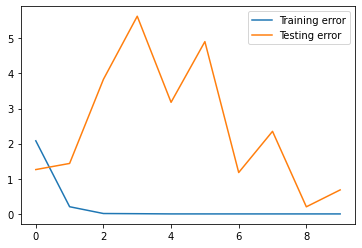

In [ ]:
plot.plot(error_train, label='Training error')
plot.plot(error_test,label='Testing error')
plot.legend(loc='best')


Now we are generating 100  random data point to see how it affects the model



In [ ]:
additional_data = 100
X_latest = np.sort(np.random.uniform(0, 1, additional_data))
X_latest = X_latest[:,np.newaxis]

Y_latest = np.sin(2*np.pi*X_latest) + n * 0.1


No handles with labels found to put in legend.


[]

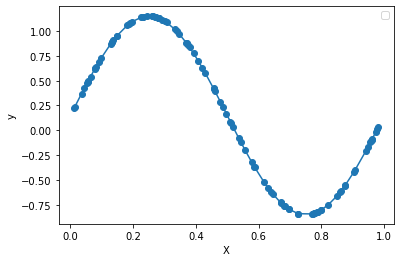

In [ ]:
plot.scatter(X_latest, Y_latest)
plot.plot(X_latest, Y_latest)
plot.xlabel("X")
plot.ylabel("y")
plot.legend(loc='best')
plot.plot()

Regularizing using the sum of weights

[]

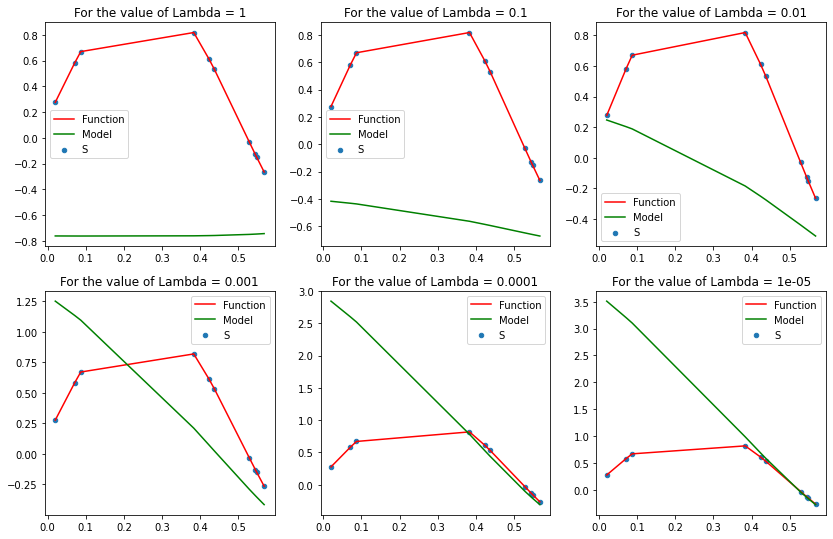

In [ ]:

x_latest_pol = pol.transform(X_latest)
y_latest_pred = model.predict(x_latest_pol)
regression_train_error = []
regression_test_error = []
lam = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
plot.figure(figsize=(14,14))
for i in range(len(lam)):
  r = Ridge(alpha=lam[i])
  r.fit(x_train_pol,train_y)
  
  ridge_train_pred_y = r.predict(x_train_pol)
  train_ridge_error = np.sqrt(((ridge_train_pred_y - train_y)**2).mean())
  regression_train_error.append(train_ridge_error)

  ridge_test_pred_y = r.predict(x_test_pol)
  test_ridge_error = np.sqrt(((ridge_test_pred_y - test_y)**2).mean())
  regression_test_error.append(test_ridge_error)
  
  plot.subplot(len(lam)/2, len(lam)/2,i+1)
  plot.scatter(test_x, test_y, s=20, label = 'S')
  plot.plot(test_x,test_y,color='r', label = 'Function')
  plot.plot(test_x,ridge_test_pred_y,color='g', label='Model')
  plot.title("For the value of Lambda = {}".format(lam[i]))
  plot.legend(loc="best")
plot.plot()





Comparing latest testing and training error

([], <a list of 0 Text major ticklabel objects>)

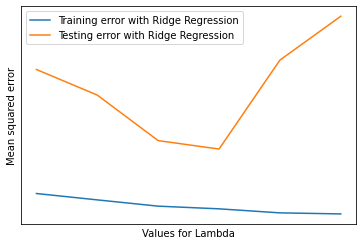

In [ ]:
plot.plot(regression_train_error, label='Training error with Ridge Regression')
plot.plot(regression_test_error, label='Testing error with Ridge Regression')
plot.legend(loc='best')
plot.xlabel('Values for Lambda')
plot.ylabel('Mean squared error')
plot.xticks([])
plot.yticks([])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021706381975778594, tolerance: 5.6193344558993535e-05
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023445663978307867, tolerance: 5.6193344558993535e-05
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014793129970163798, tolerance: 5.6193344558993535e-05
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

[]

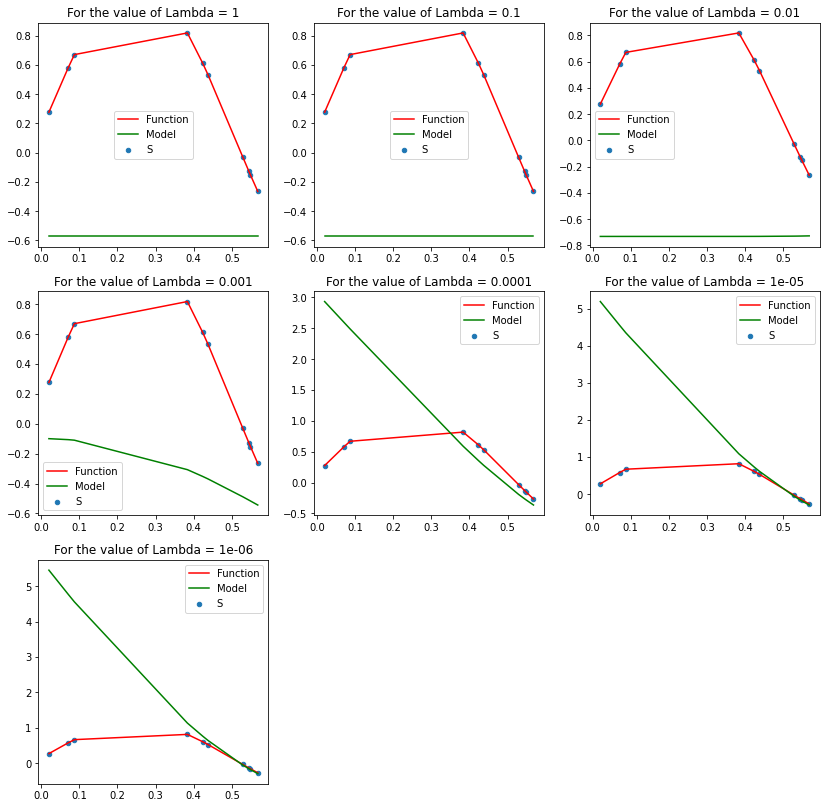

In [ ]:
#Lasso
from sklearn.linear_model import Lasso
x_latest_pol1 = pol.transform(X_latest)
y_latest_pred1 = model.predict(x_latest_pol)
regression_train_error1 = []
regression_test_error1 = []
lam1 = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 , 1/1000000]
plot.figure(figsize=(14,14))
for i in range(len(lam1)):
  L = Lasso(alpha=lam1[i])
  L.fit(x_train_pol,train_y)
  
  Lasso_train_pred_y = L.predict(x_train_pol)
  train_lasso_error = np.sqrt(((Lasso_train_pred_y - train_y)**2).mean())
  regression_train_error1.append(train_lasso_error)

  Lasso_test_pred_y = L.predict(x_test_pol)
  test_Lasso_error = np.sqrt(((Lasso_test_pred_y - test_y)**2).mean())
  regression_test_error1.append(test_Lasso_error)
  
  plot.subplot(len(lam1)/2, len(lam1)/2,i+1)
  plot.scatter(test_x, test_y, s=20, label = 'S')
  plot.plot(test_x,test_y,color='r', label = 'Function')
  plot.plot(test_x,Lasso_test_pred_y,color='g', label='Model')
  plot.title("For the value of Lambda = {}".format(lam1[i]))
  plot.legend(loc="best")
plot.plot()

References:
1. (https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html [link text](https://))
2. https://www.bogotobogo.com/python/scikit-learn/scikit-learn_logistic_regression.php
3. https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a
4. https://pythonforundergradengineers.com/plotting-sin-cos-with-matplotlib.html
5. https://en.wikipedia.org/wiki/Overfitting
6. https://www.w3schools.com/python/matplotlib_subplots.asp